# LeNet Architecture

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
training_set=train_datagen.flow_from_directory('dataset/Train',target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset/Test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 900 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [5]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,3,3,input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(3, activation='softmax'))

Classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy','Precision','Recall'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 74, 74, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 7

In [6]:
model_path = "LeNet.h5"

callbacks = [
    ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)
]

In [7]:
epochs = 20
batch_size = 32

In [8]:
history=Classifier.fit( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/20
28/28 [==============================] - 58s 2s/step - loss: 0.7755 - accuracy: 0.6002 - precision: 0.7269 - recall: 0.3802 - val_loss: 0.5085 - val_accuracy: 0.7656 - val_precision: 0.7705 - val_recall: 0.7344

Epoch 00001: accuracy improved from -inf to 0.60023, saving model to LeNet.h5
Epoch 2/20
28/28 [==============================] - 53s 2s/step - loss: 0.5094 - accuracy: 0.7235 - precision: 0.7275 - recall: 0.7166 - val_loss: 0.4425 - val_accuracy: 0.7969 - val_precision: 0.8230 - val_recall: 0.7266

Epoch 00002: accuracy improved from 0.60023 to 0.72350, saving model to LeNet.h5
Epoch 3/20
28/28 [==============================] - 46s 2s/step - loss: 0.4726 - accuracy: 0.7880 - precision: 0.8007 - recall: 0.7546 - val_loss: 0.7131 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875

Epoch 00003: accuracy improved from 0.72350 to 0.78802, saving model to LeNet.h5
Epoch 4/20
28/28 [==============================] - 52s 2s/step - loss: 0.4682 - accuracy: 

In [9]:
print("[INFO] Calculating model accuracy")
scores = Classifier.evaluate(test_set)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
5/5 [==============================] - 4s 838ms/step - loss: 0.1998 - accuracy: 0.8867 - precision: 0.8867 - recall: 0.8867
Test Accuracy: 88.66666555404663


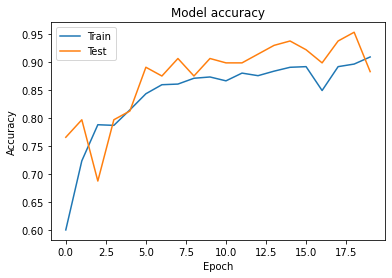

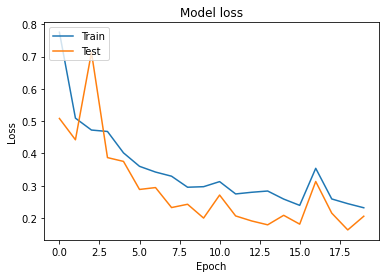

In [10]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()

In [13]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['precision'])  # from the history var take the accuracy history
    plt.plot(history.history['val_precision'])  # from the history var take the val_accuracy history    
        
    plt.title('Model precision')
    plt.ylabel('precision')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left') # represents which graph is train and test
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['recall'])
    plt.plot(history.history['val_recall'])
        
    plt.title('Model recall')
    plt.ylabel('recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

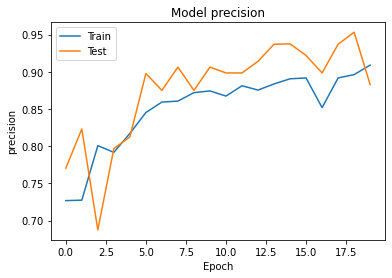

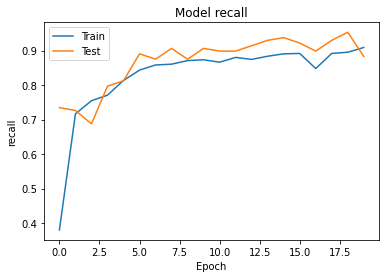

In [14]:
graph()